# Project Milestone 2

## Tools

In the first part of the notebook, you can observe the primary tools we are using for the analysis. It is required to install the pandas version 1.0.5.

In [ ]:
pip install pandas==1.0.5

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import nltk
import requests
import pickle
import warnings
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
print('pandas version: ' + pd.__version__)

pandas version: 1.0.5


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_data = '/content/drive/MyDrive/Quotebank/'

The following three cells include helper functions that helped the creation of our final dataset containing the quotes about climate change. The functions include itetaring through chunks, showing the first few elements of a chunk, and an imported function for finding synonyms of a provided word.

In [5]:
# loop through nb_chunks_to_read chunks (if 0, through all chunks) and apply process_function to each of them
# return the result as a dataframe
def loop_chuncks(chunks, process_function, nb_chunks_to_read=0):
  i = 0
  result = []
  columns = None
  for chunk in chunks:
    processed = process_function(chunk)
    if processed is not None:
      if not isinstance(processed, pd.Series):
        columns = processed.columns
      for r in processed.values.tolist():
        result.append(r)
    i += 1
    if i == nb_chunks_to_read:
      break
  return pd.DataFrame(result, columns=columns)

In [6]:
# return the first 3 elements of a chunk
def chunck_head(chunk):
  return chunk.head(3)

# example
chunks = pd.read_json(path_data + 'quotes-2020.json.bz2', lines=True, compression='bz2', chunksize=10000)
loop_chuncks(chunks, chunck_head, 1)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2020-01-28-000082,[ D ] espite the efforts of the partners to cr...,None,[],2020-01-28 08:04:05,1,"[[None, 0.7272], [Prime Minister Netanyahu, 0....",[http://israelnationalnews.com/News/News.aspx/...,E
1,2020-01-16-000088,[ Department of Homeland Security ] was livid ...,Sue Myrick,[Q367796],2020-01-16 12:00:13,1,"[[Sue Myrick, 0.8867], [None, 0.0992], [Ron Wy...",[http://thehill.com/opinion/international/4782...,E
2,2020-02-10-000142,... He (Madhav) also disclosed that the illega...,None,[],2020-02-10 23:45:54,1,"[[None, 0.8926], [Prakash Rai, 0.1074]]",[https://indianexpress.com/article/business/ec...,E


In [7]:
# to create automatically a list of synonyms (not currently used)
# https://towardsdatascience.com/synonyms-and-antonyms-in-python-a865a5e14ce8
nltk.download('wordnet')

def find_synonyms(word):
  words = []
  for syn in wordnet.synsets(word):
    for lm in syn.lemmas():
      words.append(lm.name())
  return words

# example
find_synonyms('climate')
find_synonyms('environment')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['environment', 'environment', 'environs', 'surroundings', 'surround']

## Creation of the dataset about climate change

The creation of the dataset was executed by iterating through quotes and finding all of them that mention climate change in any matter. We used python pickles to save the extracted quotes, one for every year from 2015 until 2020. We saved the pickles on Google drive and provided the link where you can download it. We provided the code for creating the pickles and commented it, since it needs a long time to execute. The pickles served us well in terms of creating the final dataset and, thus, positively impacted the time our cells needed to run. As a result, we got 156691 quotes about climate change.

In [8]:
# return the quotes containing one of the words in the list

words = ['global warming', 'climate change']

def contains_word_in_list(chunk):
  return chunk[chunk.quotation.str.contains('|'.join(words), case=False)]

chunks = pd.read_json(path_data + 'quotes-2020.json.bz2', lines=True, compression='bz2', chunksize=10000)
word_in_list_quotes = loop_chuncks(chunks, contains_word_in_list, 3)

word_in_list_quotes.sample(3)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
1,2020-01-29-062975,Many make the link today between their experie...,Peter Maurer,"[Q117796, Q42426597]",2020-01-29 09:04:36,5,"[[Peter Maurer, 0.8787], [None, 0.1213]]",[http://whbl.com/news/articles/2020/jan/29/hun...,E
47,2020-02-27-021384,His central campaign issue will be climate cha...,None,[],2020-02-27 16:16:51,1,"[[None, 0.8692], [Jay Inslee, 0.0985], [Amy Kl...",[https://mediamatters.org/broadcast-networks/h...,E
25,2020-01-08-072392,"The insurance claims will be enormous, but so ...",Tim Buckley,[Q7803241],2020-01-08 11:47:01,3,"[[Tim Buckley, 0.8037], [None, 0.1963]]",[http://www.ipsnews.net/2020/01/australias-bus...,E


In [9]:
# to load and save pickes (from the course tutorial)
def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

def save_pickle(result, file_path = 'pickle'):
    with open(file_path, 'wb') as file:
        pickle.dump(result, file)

In [10]:
# create a pickle of the quotes about climate change for the 2020 dataset
# this have been done for the 6 datasets, commented to not re-run it (very long)
# chunks = pd.read_json(path_data + 'quotes-2020.json.bz2', lines=True, compression='bz2', chunksize=10000)
# climate_2020 = loop_chuncks(chunks, contains_word_in_list)
# path_pickle_2020 = '/content/drive/MyDrive/pickle_2020'
# save_pickle(climate_2020, path_pickle_2020)

In [11]:
# load the pickles
# the pickles need to be added to the drive
# download here: https://drive.google.com/drive/folders/1j1Bp1niC0_cqg1kN_LbSrA2TGnq5MTgt?usp=sharing
climate_2015 = load_pickle('/content/drive/MyDrive/pickle_2015')
climate_2016 = load_pickle('/content/drive/MyDrive/pickle_2016')
climate_2017 = load_pickle('/content/drive/MyDrive/pickle_2017')
climate_2018 = load_pickle('/content/drive/MyDrive/pickle_2018')
climate_2019 = load_pickle('/content/drive/MyDrive/pickle_2019')
climate_2020 = load_pickle('/content/drive/MyDrive/pickle_2020')
all_years_list = [climate_2015, climate_2016, climate_2017, climate_2018, climate_2019, climate_2020]
all_years = [2015, 2016, 2017, 2018, 2019, 2020]
for i in range(len(all_years)):
  all_years_list[i]['year'] = all_years[i]

In [12]:
# create one dataframe for all the years
climate_all_years = pd.concat(all_years_list, ignore_index=True)
print(climate_all_years.shape)
climate_all_years.sample(3)

(156691, 10)


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year
136182,2019-10-29-013779,Climate change is big priority for our adminis...,Josh Tenorio,[Q58323185],2019-10-29 14:05:00,1,"[[Josh Tenorio, 0.9499], [None, 0.0501]]",[http://www.postguam.com/news/local/climate-ch...,E,2019
29850,2016-09-16-016995,concept of global warming was created by and f...,Donald Trump,"[Q22686, Q27947481]",2016-09-16 17:25:51,15,"[[Donald Trump, 0.7106], [None, 0.2369], [Bern...",[http://www.theglobeandmail.com/opinion/trump-...,E,2016
105483,2019-02-19-014038,Catastrophic events will happen whether climat...,None,[],2019-02-19 05:49:37,1,"[[None, 0.8065], [Terry Jones, 0.1935]]",[https://ksby.com/news/2019/02/18/cal-poly-res...,E,2019


## First analyses

Following few cells show our first, basic analysis. We included the top speakers from the quotes about climate change, the words that appeared the most in our quotes, and number of climate change quotes per year.

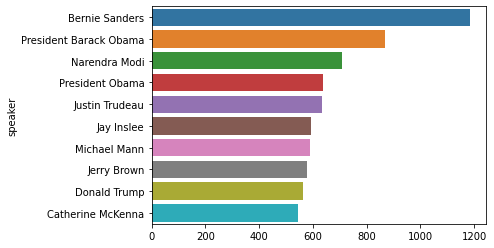

In [13]:
# the top speakers talking about climate change
top_speakers = climate_all_years.groupby(by='speaker').count().sort_values(by='quotation', ascending=False).quotation.iloc[1:21]
sns.barplot(x=top_speakers[:10].values, y=top_speakers[0:10].index)

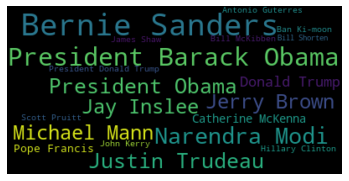

In [14]:
# word cloud of top speakers for illustration
wordcloud = WordCloud().fit_words(dict(top_speakers))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


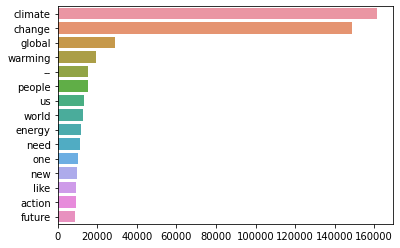

In [15]:
# words being most used in these quotes about global warming
nltk.download('stopwords')
topic_words = collections.Counter()
stop_words = set(stopwords.words('english'))
for index, row in climate_all_years.iterrows():
    for word in row.quotation.lower().replace(',', '').replace('.', '').split():
        if word not in stop_words:
            topic_words[word] += 1
top_50_climate_words = topic_words.most_common()[:50]
sns.barplot(x=[x[1] for x in top_50_climate_words][:15], y=[x[0] for x in top_50_climate_words][:15])

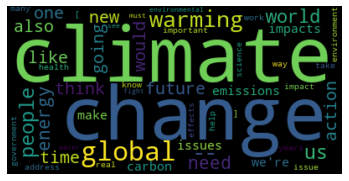

In [16]:
# word cloud for illustration
wordcloud = WordCloud().fit_words(dict(top_50_climate_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Quotations about global warming though time')

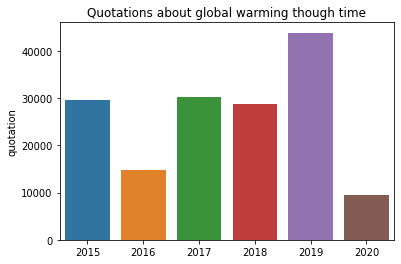

In [17]:
# number of quotations about global warming through the years
count_years =  climate_all_years.groupby(by='year').count().quotation
sns.barplot(x=all_years, y=count_years)
plt.title("Quotations about global warming though time")

Interestingly enough, we can observe a drop of the number of quotes about climate change in the year 2020.

## Nationalities

This section of our notebook provided us an augmented dataframe that includes the nationality of a speaker that said something about the climate change in his or her quote. We used Wikidata to extract the information about a country and merge it with the existing quote and its speaker. This will allow us to perform different research questions analysis on speakers which origins are different, and potentially observe the difference between the groups of countries, augmented as regions.

In [18]:
# read the wikidata file
path_data_wikidata = '/content/drive/MyDrive/speaker_attributes.parquet/'
wikidata = pd.read_parquet(path_data_wikidata)
wikidata.head(3)

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None


In [19]:
# wikidata dataframe without the None name
wikidata_clean = wikidata.dropna(axis=0, subset=['aliases'])

In [20]:
# drop the rows with speaker None
climate_all_years_clean = climate_all_years.drop(climate_all_years.index[climate_all_years['speaker'] == 'None'])
climate_all_years_clean.shape

(108024, 10)

In [21]:
# load the QID dataset
qids = pd.read_csv('/content/drive/MyDrive/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')
qids.head(2)

,Label,Description
QID,,
Q31,Belgium,country in western Europe
Q45,Portugal,country in southwestern Europe


We think that is important to mention that we have speakers in our dataset that have more than one nationality, so we will cover them in the following cells.

In [22]:
# merge the quotes about global warming with the countries from wikidata using the qids
climate_countries = climate_all_years_clean.explode('qids').merge(wikidata, left_on='qids', right_on='id')
print(climate_countries.shape)
climate_countries.head(3)

(221681, 25)


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,2015-09-28-067347,man-made emissions are an insignificant part o...,John Abraham,Q313025,2015-09-28 23:16:52,1,"[[John Abraham, 0.6469], [None, 0.3092], [Will...",[http://www.desmogblog.com/donors-capital-fund],E,2015,None,[+1972-12-17T00:00:00Z],[Q668],[Q6581097],1354134367,None,None,"[Q33999, Q4610556, Q3282637, Q10800557]",None,None,Q313025,John Abraham,None,item,[Q5043]
1,2015-02-26-060320,New Study Finds Fringe Global Warming Contrari...,John Abraham,Q313025,2015-02-26 17:16:07,1,"[[John Abraham, 0.7708], [None, 0.2051], [Harr...",[http://www.globalresearch.ca/is-the-u-s-mains...,E,2015,None,[+1972-12-17T00:00:00Z],[Q668],[Q6581097],1354134367,None,None,"[Q33999, Q4610556, Q3282637, Q10800557]",None,None,Q313025,John Abraham,None,item,[Q5043]
2,2015-09-17-007663,Any argument that global warming stopped 18 or...,John Abraham,Q313025,2015-09-17 10:01:00,2,"[[John Abraham, 0.8673], [None, 0.1292], [Lama...",[http://www.environmentalhealthnews.org/t/1883...,E,2015,None,[+1972-12-17T00:00:00Z],[Q668],[Q6581097],1354134367,None,None,"[Q33999, Q4610556, Q3282637, Q10800557]",None,None,Q313025,John Abraham,None,item,[Q5043]


In [23]:
# add the labels of the countries
climate_countries_label = climate_countries.explode('nationality').merge(qids, left_on='nationality', right_on='QID')
print(climate_countries_label.shape)
climate_countries_label.drop(columns=['id', 'label', 'Description', 'aliases', 'date_of_birth', 'gender', 
                                      'lastrevid', 'ethnic_group', 'US_congress_bio_ID', 'occupation',
                                      'party', 'academic_degree', 'candidacy', 'type', 'religion'], axis=1, inplace=True)
climate_countries_label = climate_countries_label.rename(columns={'nationality': 'nationality_qid', 
                                                                  'Label': 'nationality_label'})
climate_countries_label.sample(3)

(178900, 27)


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year,nationality_qid,nationality_label
67141,2017-09-24-068213,These days with climate change and high-risk o...,Larry Bishop,Q593071,2017-09-24 07:53:39,1,"[[Larry Bishop, 0.9468], [None, 0.0532]]",[https://www.noozhawk.com/article/irv_beiman_o...,E,2017,Q30,United States of America
108510,2018-12-02-008049,"Climate change, the death of oceans, these are...",Paul Martin,Q44694092,2018-12-02 19:26:11,1,"[[Paul Martin, 0.7372], [Lawrence Summers, 0.2...",[https://www.hellenicshippingnews.com/the-late...,E,2018,Q664,New Zealand
134983,2017-08-10-126792,The reason it has dried up over a long period ...,Ian Read,Q20797619,2017-08-10 17:00:00,3,"[[Ian Read, 0.7294], [None, 0.2706]]",[http://m.nzherald.co.nz/entertainment/news/ar...,E,2017,Q145,United Kingdom


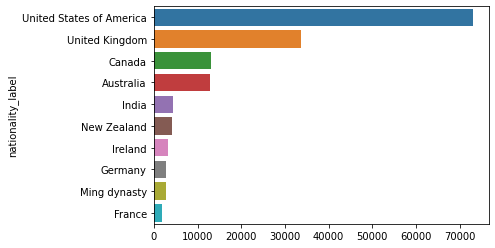

In [24]:
# number of quotes by countries
countries = climate_countries_label.groupby(by='nationality_label').count().sort_values(by='quotation', ascending=False).quotation
sns.barplot(x=countries[:10].values, y=countries[:10].index)

It is time for a clear visualization of the nationality of our speakers, so we are providing an intersting map of the world for a clear vision! :)

In [ ]:
pip install pycountry

In [ ]:
pip install geopandas

In [ ]:
pip install mapclassify

In [28]:
import pycountry 
import geopandas

In [29]:
# generate country code  based on country name 
# from https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

In [30]:
# add to the country dataframe all the infos about the countries for the world map
countries_df = pd.DataFrame(countries)
countries_df.reset_index(inplace=True)
countries_df.replace('United States of America', 'United States', inplace=True)
countries_df['CODE'] = alpha3code(countries_df.nationality_label)
countries_df = countries_df.drop(countries_df.index[countries_df['CODE'] == 'None'])
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
countries_geo = pd.merge(world, countries_df,on='CODE')
countries_geo.sample(3)

,pop_est,continent,name,CODE,gdp_md_est,geometry,nationality_label,quotation
54,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Angola,11
112,104256076,Asia,Philippines,PHL,801900.0,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ...",Philippines,655
61,2314307,Asia,Qatar,QAT,334500.0,"POLYGON ((50.81011 24.75474, 50.74391 25.48242...",Qatar,11


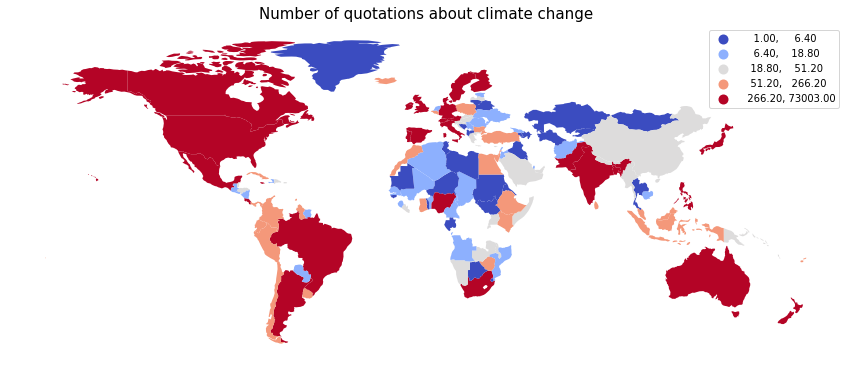

In [31]:
# plot the number of quotations on the world map
countries_geo.plot(column='quotation', scheme="quantiles", figsize=(15, 20), legend=True, cmap='coolwarm')
plt.title('Number of quotations about climate change',fontsize=15)
plt.axis("off")
plt.show()

## Political parties

Political parties are an important part of our analysis, so in this section we are extracting all the information about them that we will merge with our data set containing quotes abog climate change. The idea is, also, to divide the political parties into left-wing and right-wing parties and try to perform a classification that will provide us with the information is there a difference on how left-wing and right-wing parties treat climate change.

In [32]:
# merge the quotes about global warming with the wikidata using the qids
climate_wikidata = climate_all_years_clean.explode('qids').merge(wikidata, left_on='qids', right_on='id')
climate_wikidata.drop(columns=['id', 'label'], axis=1, inplace=True)
print(climate_wikidata.shape)
climate_wikidata.head(3)

(221681, 23)


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,candidacy,type,religion
0,2015-09-28-067347,man-made emissions are an insignificant part o...,John Abraham,Q313025,2015-09-28 23:16:52,1,"[[John Abraham, 0.6469], [None, 0.3092], [Will...",[http://www.desmogblog.com/donors-capital-fund],E,2015,None,[+1972-12-17T00:00:00Z],[Q668],[Q6581097],1354134367,None,None,"[Q33999, Q4610556, Q3282637, Q10800557]",None,None,None,item,[Q5043]
1,2015-02-26-060320,New Study Finds Fringe Global Warming Contrari...,John Abraham,Q313025,2015-02-26 17:16:07,1,"[[John Abraham, 0.7708], [None, 0.2051], [Harr...",[http://www.globalresearch.ca/is-the-u-s-mains...,E,2015,None,[+1972-12-17T00:00:00Z],[Q668],[Q6581097],1354134367,None,None,"[Q33999, Q4610556, Q3282637, Q10800557]",None,None,None,item,[Q5043]
2,2015-09-17-007663,Any argument that global warming stopped 18 or...,John Abraham,Q313025,2015-09-17 10:01:00,2,"[[John Abraham, 0.8673], [None, 0.1292], [Lama...",[http://www.environmentalhealthnews.org/t/1883...,E,2015,None,[+1972-12-17T00:00:00Z],[Q668],[Q6581097],1354134367,None,None,"[Q33999, Q4610556, Q3282637, Q10800557]",None,None,None,item,[Q5043]


In [33]:
# add the labels of the parties
climate_wikidata_label = climate_wikidata.explode('party').merge(qids, left_on='party', right_on='QID')
climate_wikidata_label.drop(columns=['Description'], axis=1, inplace=True)
climate_wikidata_label.rename(columns={'Label': 'party_label'}, inplace=True)

In [34]:
# add the labels of all the countries
climate_wikidata_label = climate_wikidata_label.explode('nationality').merge(qids, left_on='nationality', right_on='QID')
climate_wikidata_label.drop(columns=['Description'], axis=1, inplace=True)
climate_wikidata_label.rename(columns={'Label': 'nationality_label'}, inplace=True)
climate_wikidata_label.sample(3)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,candidacy,type,religion,party_label,nationality_label
7775,2018-10-17-154847,You have scientists on both sides of the issue...,Donald Trump,Q22686,2018-10-17 19:06:02,2,"[[Donald Trump, 0.6431], [None, 0.3569]]",[http://vanityfair.com/news/2018/10/trump-very...,E,2018,"[Donald John Trump, Donald J. Trump, Trump, Th...",[+1946-06-14T00:00:00Z],Q30,[Q6581097],1395141850,None,None,"[Q911554, Q557880, Q3427922, Q15980158, Q13152...",Q29552,[Q787674],"[Q699872, Q22923830, Q38051523]",item,[Q178169],Democratic Party,United States of America
55171,2020-01-15-067243,"Quite frankly, allowing some provinces to... l...",Brian Pallister,Q2924976,2020-01-15 12:34:00,8,"[[Brian Pallister, 0.8072], [None, 0.1803], [J...",[http://www.newwestrecord.ca/manitoba-premier-...,E,2020,None,[+1954-07-06T00:00:00Z],Q16,[Q6581097],1389226247,None,None,"[Q17516936, Q82955]",Q3366633,None,None,item,None,Progressive Conservative Party of Manitoba,Canada
55188,2019-09-28-016117,"I have a drawer full of letters and, much to m...",Rochelle Squires,Q24053382,2019-09-28 00:00:00,1,"[[Rochelle Squires, 0.938], [None, 0.062]]",[https://www.winnipegfreepress.com/local/city-...,E,2019,None,None,Q16,[Q6581072],1389304648,None,None,[Q82955],Q3366633,None,None,item,None,Progressive Conservative Party of Manitoba,Canada


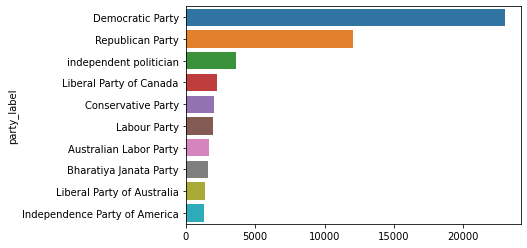

In [35]:
# number of quotes by parties in the world
parties = climate_wikidata_label.groupby(by='party_label').count().sort_values(by='quotation', ascending=False).quotation
sns.barplot(x=parties[:10].values, y=parties[:10].index)

In [36]:
# number of quotes by countries and parties in the world
parties_countries = climate_wikidata_label.groupby(by=['nationality_label', 'party_label']).count().sort_values(by='quotation', ascending=False).quotation
parties_countries_df = pd.DataFrame(parties_countries)
parties_countries_df.reset_index(inplace=True)
parties_countries_df = pd.DataFrame(parties_countries)
parties_countries_df.reset_index(inplace=True)

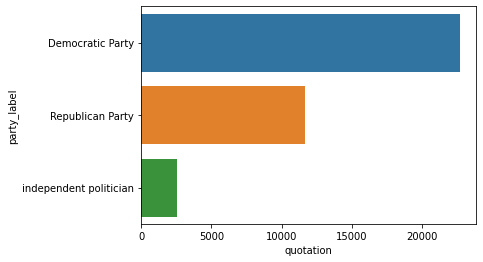

In [37]:
# parties for the USA
US_data = parties_countries_df[parties_countries_df.nationality_label == 'United States of America']
sns.barplot(data=US_data[:3], x='quotation', y='party_label')

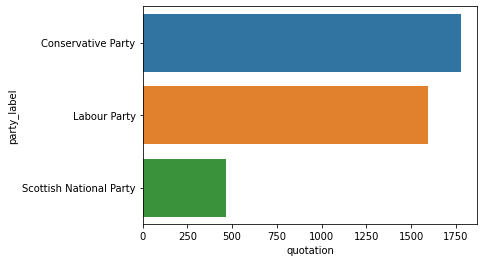

In [38]:
# parties for the UK
UK_data = parties_countries_df[parties_countries_df.nationality_label == 'United Kingdom']
sns.barplot(data=UK_data[:3], x='quotation', y='party_label')

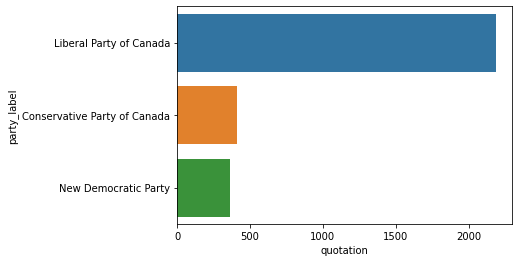

In [39]:
# parties for Canada
canada_data = parties_countries_df[parties_countries_df.nationality_label == 'Canada']
sns.barplot(data=canada_data[:3], x='quotation', y='party_label')

## Age categories

Age categories analysis will help us determine is there a significant difference in the opinions of different age groups about climate change. By adding the age information to every speaker of a quote, we will try to summarize, compare, and observe the opinions that people of a certain age have about climate change.

In [40]:
# to find the age category
def age_category(age):
  if age < 17:
    return '0-16'
  elif age < 31:
    return '17-30'
  elif age < 46:
    return '31-45'
  elif age < 66:
    return '46-65'
  else:
    return '66+'

In [41]:
# create birth_year, age and age_category columns
climate_wikidata_ages = climate_wikidata_label.dropna(axis=0, subset=['date_of_birth'])
climate_wikidata_ages['birth_year'] = climate_wikidata_ages.date_of_birth.apply(lambda x: int(x[0][1:5]))
climate_wikidata_ages['age'] = climate_wikidata_ages['year'] - climate_wikidata_ages['birth_year']
climate_wikidata_ages['age_category'] = climate_wikidata_ages['age'].apply(age_category)
climate_wikidata_ages.sample(3)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,candidacy,type,religion,party_label,nationality_label,birth_year,age,age_category
32764,2019-11-19-019006,Estimates say that climate change will cost Am...,Mike Thompson,Q6849042,2019-11-19 21:04:32,1,"[[Mike Thompson, 0.8207], [None, 0.1793]]",[http://biodieselmagazine.com/articles/2516847...,E,2019,None,[+1976-10-11T00:00:00Z],Q30,[Q6581097],1392780925,None,None,[Q82955],Q29468,None,None,item,None,Republican Party,United States of America,1976,43,31-45
73527,2018-10-03-124117,We are recognising a statesman who embodies tr...,Antonio Guterres,Q311440,2018-10-03 20:15:37,2,"[[Antonio Guterres, 0.4184], [None, 0.246], [N...",[http://www.asianage.com/india/all-india/04101...,E,2018,"[António Manuel de Oliveira Guterres, Antonio ...",[+1949-04-30T00:00:00Z],Q45,[Q6581097],1393338513,None,None,"[Q82955, Q81096, Q5669847]",Q847263,None,None,item,[Q9592],Socialist Party,Portugal,1949,69,66+
17367,2018-10-11-018031,"Climate change is real, it is being driven by ...",Chuck Schumer,Q380900,2018-10-11 17:59:34,1,"[[Chuck Schumer, 0.8816], [None, 0.1184]]",[http://pjmedia.com/news-and-politics/schumer-...,E,2018,"[Charles Ellis ""Chuck"" Schumer, Charles Schume...","[+1950-11-23T00:00:00Z, +1950-10-23T00:00:00Z]",Q30,[Q6581097],1393497897,[Q7325],S000148,[Q82955],Q29552,None,None,item,"[Q9268, Q1133485]",Democratic Party,United States of America,1950,68,66+


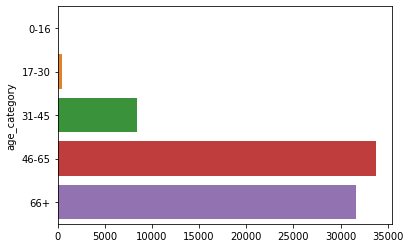

In [42]:
# number of quotes by age category in the world
age_categories = climate_wikidata_ages.groupby(by='age_category').count().quotation
sns.barplot(x=age_categories[:10].values, y=age_categories[:10].index)

## Sentiment analysis


In this part of our analysis, we will implement the afinn library with a goal of extracting the sentiment score of the quotes about climate change. The quotes will be placed in three different groups: positive, negative, and neutral. 

In [ ]:
! pip install afinn

In [44]:
from afinn import Afinn
afn = Afinn()

In [45]:
#We are iterating through the quotes, and the afinn calculates the sentiment score for every quote
sentiments = [afn.score(quote) for quote in climate_all_years.quotation]

In [46]:
#Every quote will be enriched with its sentiment category
sentiment_category = ['positive' if score > 0 else 'negative' if score < 0 else 'neutral' for score in sentiments]

In [47]:
#Adding the sentiment score and category to the dataframe with quotes
climate_all_years['sentiment_score'] = sentiments
climate_all_years['sentiment_category'] = sentiment_category

In [48]:
#Describing the sentiment score
climate_all_years['sentiment_score'].describe()

count    156691.000000
mean          0.495957
std           4.048494
min         -46.000000
25%          -2.000000
50%           0.000000
75%           2.000000
max          71.000000
Name: sentiment_score, dtype: float64

In [49]:
#Describing the sentiment category
climate_all_years['sentiment_category'].value_counts()

positive    66784
negative    53078
neutral     36829
Name: sentiment_category, dtype: int64